In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [7]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [8]:
q4 = "SELECT name FROM facts WHERE population=0"
pd.read_sql_query(q4, conn)

,name
0,Antarctica


In [13]:
q5 = "SELECT name FROM facts WHERE population=7256490011"
pd.read_sql_query(q5, conn)

,name
0,World


Antarctica has a population of 0 and there is a country name of "World", an error.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172c7128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11798bb70>]], dtype=object)

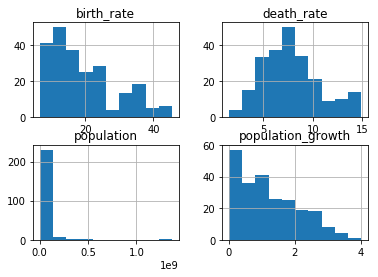

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE NOT population = 0 AND NOT population = 7256490011"
results = pd.read_sql_query(q6, conn)
results.hist()